Import des modules essentiels

In [21]:
import pandas as pd
import numpy as np

Lecture du fichier csv

In [22]:
df = pd.read_csv("heights.csv")

Drop de la colonne en trop

In [23]:
df.drop(columns="Unnamed: 0")

,sex,height
0,Male,75.000000
1,Male,70.000000
2,Male,68.000000
3,Male,74.000000
4,Male,61.000000
...,...,...
1045,Female,69.000000
1046,Male,69.000000
1047,Male,63.385827
1048,Male,66.000000


Définition de notre cible et nos prédicteurs

In [24]:
y = df["sex"]
x = df["height"]
#La majorité des algorithmes de prédicitons, attendent au minimum des listes 2D donc on reshape notre x
x_reshaped = x.to_numpy().reshape(-1, 1)
#Encodage manuel
#Lorsque l'on utilise map avec un dictionnaire, il assimile automatiquement les valeurs
df["sex_encoded"] = y.map({"Male":0, "Female":1})
y_encoded=df["sex_encoded"]

Import de l'algo de prédicition et mise en place de la séparation train, test

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_reshaped,y_encoded, test_size=0.5, random_state=42)

In [27]:
#Définiton de notre model
model = LogisticRegression()
#On entraine notre modèle avec les données d'entrainement (TOUJOURS)
model.fit(X_train, y_train)

LogisticRegression()

Passons à l'évaluation de notre modèle

Commencons par la matrice de confusion

In [28]:
from sklearn.metrics import confusion_matrix
# Supposons que y_test sont les vraies étiquettes et que model est votre modèle entraîné
y_pred = model.predict(X_test)  # Obtenez les prédictions pour l'ensemble de test

# Calculer le tableau de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
#Attention, avec sklearn, la matrice de confusion est disposé comme suit : [[Vrai Négatif (VN), Faux Positif (FP)]
                                                                            #[Faux Négatif (FN), Vrai Positif (VP)]]

[[385  19]
 [ 85  36]]


Un rapport complet pour chaque classe, précision, accuracy, recall, f1-score vous êtes servie

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)


              precision    recall  f1-score   support

     Class 0       0.82      0.95      0.88       404
     Class 1       0.65      0.30      0.41       121

    accuracy                           0.80       525
   macro avg       0.74      0.63      0.65       525
weighted avg       0.78      0.80      0.77       525



Un autre indicateur essentiel, la courbe ROC

In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:
# Obtenir les probabilités pour la classe positive
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

Plot avec matplotlib

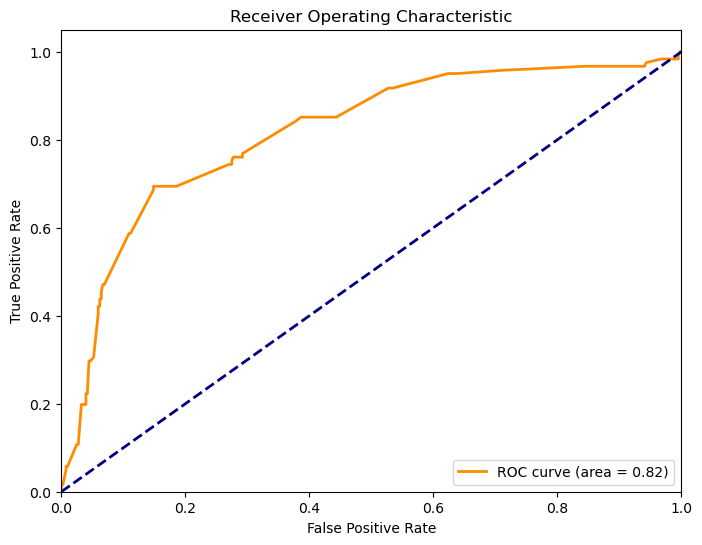

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
